In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# display settings
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
print(os.getcwd())
os.chdir("../to students/data")
print(os.getcwd())
path_list = ['instance 1.csv',
 'instance 3.csv',
 'instance 2.csv',
 'instance 5.csv',
 'instance 4.csv']

/Users/wangyanpu/Desktop/台灣大學/大三下/作業研究/case/Case2/baseline
/Users/wangyanpu/Desktop/台灣大學/大三下/作業研究/case/Case2/to students/data


In [3]:
def data_exploration(df, file_name):

    mfor1 = df['Stage-1 Machines']
    mfor2 = df['Stage-2 Machines']
    mfor1 = [list(map(int, x.split(','))) for x in mfor1]
    mfor2 = [list(map(int, x.split(','))) for x in mfor2 if x is not np.nan]
    mfor1 = [item for sublist in mfor1 for item in sublist]
    mfor2 = [item for sublist in mfor2 for item in sublist]
    machine_set = list(set(mfor1 + mfor2))

    df["total processing time"] = df["Stage-1 Processing Time"] + df["Stage-2 Processing Time"]
    df["due process ratio"] = df["Due Time"] / df["total processing time"]

    # display(df.describe())
    job_num = len(df.index)
    machine_num = len(machine_set)
    pt1_sum = df["Stage-1 Processing Time"].sum()
    pt2_sum = df["Stage-2 Processing Time"].sum()
    due_sum = df["Due Time"].sum()

    print("job num:", job_num)
    print("machine num:", machine_num)
    print("pt sum 1:", pt1_sum)
    print("pt sum 2:", pt2_sum)
    print("total working time:", machine_num * 24)
    print("total processing time:", pt1_sum + pt2_sum)
    print("due time sum:", due_sum)
    print("job machine ratio", job_num / machine_num)
    print("due process ratio:", due_sum / (pt1_sum + pt2_sum))
    print("min due process ratio:", df["due process ratio"].min())
    print("max due process ratio:", df["due process ratio"].max())

    plt.scatter(df["total processing time"].values, df["Due Time"].values)
    plt.title(file_name + " scatter plt")
    plt.xlabel("total processing time")
    plt.ylabel("due time");
    plt.savefig("../../plt/scatter_" + file_name + ".jpg")
    plt.show()
    

instance 1.csv
------------------
job num: 12
machine num: 5
pt sum 1: 18.1
pt sum 2: 11.999999999999998
total working time: 120
total processing time: 30.1
due time sum: 85
job machine ratio 2.4
due process ratio: 2.823920265780731
min due process ratio: 1.25
max due process ratio: 6.666666666666667


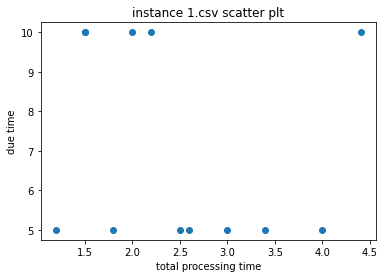

instance 3.csv
------------------
job num: 10
machine num: 5
pt sum 1: 23.900000000000002
pt sum 2: 15.0
total working time: 120
total processing time: 38.900000000000006
due time sum: 70
job machine ratio 2.0
due process ratio: 1.799485861182519
min due process ratio: 0.78125
max due process ratio: 7.692307692307692


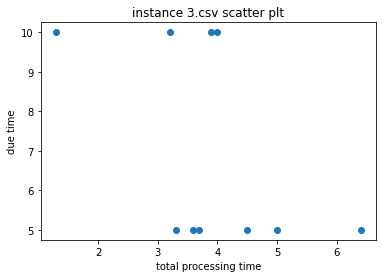

instance 2.csv
------------------
job num: 11
machine num: 5
pt sum 1: 20.7
pt sum 2: 16.2
total working time: 120
total processing time: 36.9
due time sum: 80
job machine ratio 2.2
due process ratio: 2.1680216802168024
min due process ratio: 1.2820512820512822
max due process ratio: 4.545454545454545


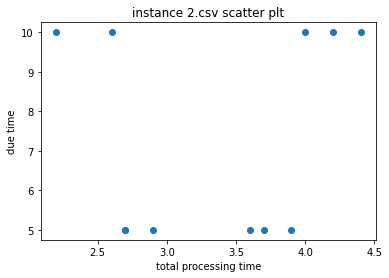

instance 5.csv
------------------
job num: 20
machine num: 9
pt sum 1: 120.69999999999999
pt sum 2: 45.900000000000006
total working time: 216
total processing time: 166.6
due time sum: 291.79999999999995
job machine ratio 2.2222222222222223
due process ratio: 1.751500600240096
min due process ratio: 1.0000000000000002
max due process ratio: 3.518518518518519


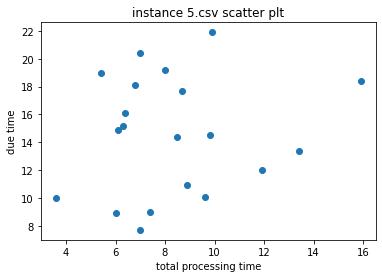

instance 4.csv
------------------
job num: 15
machine num: 7
pt sum 1: 69.63
pt sum 2: 48.41
total working time: 168
total processing time: 118.03999999999999
due time sum: 166.65
job machine ratio 2.142857142857143
due process ratio: 1.411809556082684
min due process ratio: 0.9187129551227774
max due process ratio: 3.4900542495479203


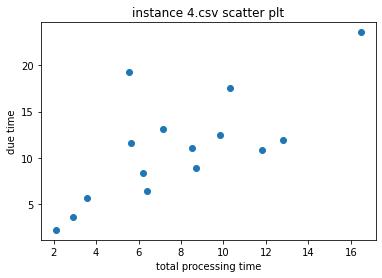

In [4]:
for file in path_list:
    print(file)
    print("------------------")
    df = pd.read_csv(file)
    # display(df)
    data_exploration(df, file)

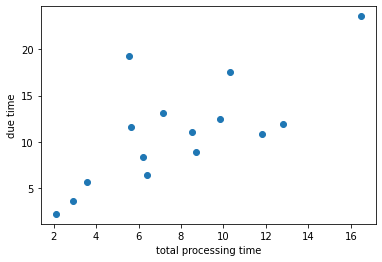

In [5]:
plt.scatter(df["total processing time"].values, df["Due Time"].values)
plt.xlabel("total processing time")
plt.ylabel("due time");
plt.show()